In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


In [ ]:
X = np.load('/content/drive/MyDrive/Pnemonia/X_labellll.npy')
Y = np.load('/content/drive/MyDrive/Pnemonia/Y_labellll (1).npy')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
print('Shape of X: ', X.shape)
print('Shape of Y: ',Y.shape)

Shape of X:  (5856, 128, 128, 3)
Shape of Y:  (5856,)


In [ ]:
X= (X/255.0)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X, Y, test_size= .2, random_state= 3)

In [ ]:
print('Shape of xtrain: ', xtrain.shape)
print('Shape of xtest: ',xtest.shape)
print('shape of ytrain: ',ytrain.shape)
print('shape of ytest: ',ytest.shape)

Shape of xtrain:  (4684, 128, 128, 3)
Shape of xtest:  (1172, 128, 128, 3)
shape of ytrain:  (4684,)
shape of ytest:  (1172,)


In [ ]:
feature_extractor= Sequential()
feature_extractor.add(Conv2D(64, (3,3), input_shape= (128,128,3)))
feature_extractor.add(Activation("relu"))
feature_extractor.add(MaxPooling2D(pool_size=(2, 2)))


feature_extractor.add(Conv2D(64, (3,3)))
feature_extractor.add(Activation('relu'))
feature_extractor.add(MaxPooling2D(pool_size=(2, 2)))


feature_extractor.add(Conv2D(64, (3,3)))
feature_extractor.add(Activation('relu'))
feature_extractor.add(MaxPooling2D(pool_size=(2, 2)))


feature_extractor.add(Conv2D(64, (3,3)))
feature_extractor.add(Activation('relu'))
feature_extractor.add(MaxPooling2D(pool_size=(2, 2)))


feature_extractor.add(Flatten())

In [ ]:
feature_extractor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(xtrain) #This is out X input to RF

In [ ]:
X_for_RF.shape

(4684, 2304)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
# Train the model on training data
RF_model.fit(X_for_RF, ytrain) #For sklearn no one hot encoding

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(xtest)


In [ ]:
X_test_feature.shape

(1172, 2304)

In [ ]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)


In [ ]:
prediction_RF.shape

(1172,)

In [ ]:
prediction_RF

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(ytest, prediction_RF))

Accuracy =  0.9496587030716723


# SVM

In [ ]:
from sklearn.linear_model import SGDClassifier
svm_model= SGDClassifier(loss='hinge', random_state=45)


In [ ]:
# Train the model on training data
svm_model.fit(X_for_RF, ytrain) #For sklearn no one hot encoding

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=45, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(xtest)

In [ ]:
#Now predict using the trained svm model. 
prediction_svm = svm_model.predict(X_test_feature)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(ytest, prediction_svm))

Accuracy =  0.9035836177474402


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
# Train the model on training data
dt.fit(X_for_RF, ytrain) #For sklearn no one hot encoding
#Now predict using the trained RF model. 
prediction_dt = dt.predict(X_test_feature)
print ("Accuracy = ", metrics.accuracy_score(ytest, prediction_dt))

Accuracy =  0.9069965870307167


In [ ]:
#xgboost 
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier() 
xg.fit(X_for_RF, ytrain) #For sklearn no one hot encoding
#Now predict using the trained RF model. 
prediction_xg = xg.predict(X_test_feature)
print ("Accuracy = ", metrics.accuracy_score(ytest, prediction_xg))

Accuracy =  0.9573378839590444


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics.classification import accuracy_score, log_loss

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print('Precision score for xgboost : ', precision_score(ytest, prediction_xg))
print('Recall score for xgboost : ', recall_score(ytest, prediction_xg))
print('f1 score for xgboost : ', f1_score(ytest, prediction_xg, ))

Precision score for xgboost :  0.9652375434530707
Recall score for xgboost :  0.9765533411488863
f1 score for xgboost :  0.9708624708624709


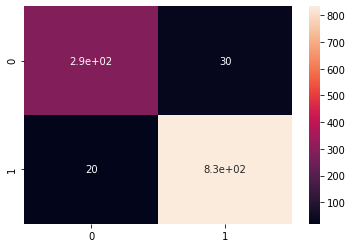

In [ ]:
#Confusion Matrix - verify accuracy of each class
import seaborn as sns

cm = confusion_matrix(ytest, prediction_xg)
#print(cm)
sns.heatmap(cm, annot=True)